In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.5.0'

In [6]:
keras.__version__

'2.5.0'

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

In [12]:
X_train_full[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [14]:
y_train[:2]

array([4, 0], dtype=uint8)

In [15]:
class_names = ["T-shirt /top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Coat'

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers

In [25]:
hidden1 = model.layers[1]

In [27]:
hidden1.name

'dense_3'

In [28]:
%whos

Variable        Type          Data/Info
---------------------------------------
X_test          ndarray       10000x28x28: 7840000 elems, type `uint8`, 7840000 bytes (7.476806640625 Mb)
X_train         ndarray       55000x28x28: 43120000 elems, type `float64`, 344960000 bytes (328.9794921875 Mb)
X_train_full    ndarray       60000x28x28: 47040000 elems, type `uint8`, 47040000 bytes (44.86083984375 Mb)
X_valid         ndarray       5000x28x28: 3920000 elems, type `float64`, 31360000 bytes (29.9072265625 Mb)
class_names     list          n=10
fashion_mnist   module        <module 'tensorflow.keras<...>shion_mnist/__init__.py'>
hidden1         Dense         <tensorflow.python.keras.<...>object at 0x7fb14a714a50>
keras           module        <module 'tensorflow.keras<...>rflow/keras/__init__.py'>
model           Sequential    <tensorflow.python.keras.<...>object at 0x7fb14a6ec610>
t               module        <module 'tensorflow' from<...>/tensorflow/__init__.py'>
tf              module 

In [30]:
model.get_layer('dense_3')

In [31]:
w, b = hidden1.get_weights()

In [32]:
w


array([[-0.05074025, -0.0227712 ,  0.01836377, ...,  0.06824939,
         0.03549162, -0.05088772],
       [ 0.04940574, -0.067908  ,  0.07103789, ...,  0.06807384,
         0.05171758,  0.03704001],
       [-0.02173799,  0.02968667, -0.04709143, ...,  0.04440468,
        -0.02368878, -0.03433584],
       ...,
       [-0.06617624, -0.07118469, -0.03289877, ...,  0.05571403,
        -0.05648552,  0.03895137],
       [-0.07227677, -0.06900006, -0.01003958, ..., -0.07234678,
         0.04733128, -0.03728772],
       [-0.03780949,  0.06026939,  0.0071229 , ...,  0.01268679,
         0.06457551, -0.07062621]], dtype=float32)

In [33]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
print(w.shape)
print(b.shape)

(784, 300)
(300,)


In [35]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])

In [36]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 976us/step - loss: 0.7161 - accuracy: 0.7688 - val_loss: 0.5253 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 2s 949us/step - loss: 0.4873 - accuracy: 0.8306 - val_loss: 0.4382 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 2s 960us/step - loss: 0.4424 - accuracy: 0.8456 - val_loss: 0.4292 - val_accuracy: 0.8570
Epoch 4/30
1719/1719 [==============================] - 2s 958us/step - loss: 0.4132 - accuracy: 0.8547 - val_loss: 0.4177 - val_accuracy: 0.8558
Epoch 5/30
1719/1719 [==============================] - 2s 961us/step - loss: 0.3955 - accuracy: 0.8613 - val_loss: 0.3748 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 2s 994us/step - loss: 0.3794 - accuracy: 0.8659 - val_loss: 0.3742 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 2s 988us/step - loss: 0.3665 - accuracy: 0.8706 - val_loss: 0.3685 -

In [37]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
history.history

{'loss': [0.7160701155662537,
  0.4872583746910095,
  0.4423917829990387,
  0.41323718428611755,
  0.3955022096633911,
  0.3794080913066864,
  0.3665488660335541,
  0.3545702397823334,
  0.3447210490703583,
  0.3356105089187622,
  0.32630640268325806,
  0.31807902455329895,
  0.31196942925453186,
  0.30390745401382446,
  0.2979864776134491,
  0.2920074462890625,
  0.28603023290634155,
  0.2803759276866913,
  0.2760072946548462,
  0.2695501148700714,
  0.2652069628238678,
  0.26030442118644714,
  0.256465882062912,
  0.2518065273761749,
  0.246734157204628,
  0.24326388537883759,
  0.23901456594467163,
  0.23496589064598083,
  0.23053322732448578,
  0.22784096002578735],
 'accuracy': [0.768818199634552,
  0.8306182026863098,
  0.8455818295478821,
  0.8547090888023376,
  0.8612909317016602,
  0.8659272789955139,
  0.8705999851226807,
  0.8733636140823364,
  0.8781454563140869,
  0.8805272579193115,
  0.8830909132957458,
  0.8852909207344055,
  0.8884181976318359,
  0.8908363580703735,
  

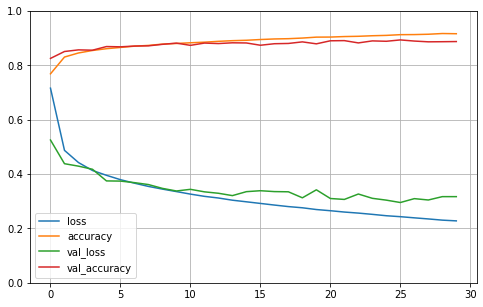

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 86.6227 - accuracy: 0.8222


[86.62266540527344, 0.8222000002861023]

In [49]:
X_new = X_test[:-3:-1]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
y_pred = model.predict_classes(X_new)
y_pred

/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 1])

In [53]:
import numpy as np
np.array(class_names)[y_pred]

array(['Sandal', 'Trouser'], dtype='<U12')

In [54]:
y_new = y_test[:-3:-1]
y_new

array([5, 1], dtype=uint8)

In [55]:
import os
root_dir = os.path.join(os.curdir, "my_logs")

In [58]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m%d-%H_%M_%S")
    return os.path.join(root_dir, run_id)

In [59]:
run_logdir = get_run_logdir()

In [60]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2237 - accuracy: 0.9198 - val_loss: 0.2973 - val_accuracy: 0.8954
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2197 - accuracy: 0.9218 - val_loss: 0.3210 - val_accuracy: 0.8810
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2166 - accuracy: 0.9220 - val_loss: 0.3004 - val_accuracy: 0.8948
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2132 - accuracy: 0.9238 - val_loss: 0.3061 - val_accuracy: 0.8880
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2104 - accuracy: 0.9248 - val_loss: 0.2909 - val_accuracy: 0.8994
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2056 - accuracy: 0.9258 - val_loss: 0.3107 - val_accuracy: 0.8856
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2034 - accuracy: 0.9273 - val_loss: 0.3036 - val_accuracy:

In [61]:
%load_ext tensorboard


In [70]:
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 48692), started 0:12:18 ago. (Use '!kill 48692' to kill it.)

In [63]:
test_logdir = get_run_logdir()

In [69]:
writer= tf.summary.create_file_writer(test_logdir)

with writer.as_default():
    for step in range(1, 1000+1):
        
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        
        data = (np.random.randn(100)+2)*step/100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32,32 ,3)
        tf.summary.image("my_images", images*step/100, step=step)
        
        texts = ["The step is "+ str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 *2 * np.pi *step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1,-1,1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)
                

In [71]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [72]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [73]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks = [keras.callbacks.EarlyStopping(patience=10)]
             )


Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


ValueError: in user code:

    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape (None, 28, 28)


In [75]:
mse_test = keras_reg.score(X_test, y_test)

ValueError: in user code:

    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1323 test_function  *
        return step_function(self, iterator)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1314 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1307 run_step  **
        outputs = model.test_step(data)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1266 test_step
        y_pred = self(x, training=False)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape (None, 28, 28)


In [76]:
y_pred = keras_reg.predict(X_new)

ValueError: in user code:

    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape (None, 28, 28)


In [77]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [79]:
param_distribs = {
    "n_hidden" : [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-3,3e-2),
}

In [80]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid,y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)]
                 )

/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/Users/I335620/opt/an

Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/Users/I335620/opt/an

/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/Users/I335620/opt/an

/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/Users/I335620/opt/an

/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/Users/I335620/opt/an

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/Users/I335620/opt/an

/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/Users/I335620/opt/an

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100
Epoch 1/100


/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/Users/I335620/opt/an

/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", lin

Epoch 1/100
Epoch 1/100


ValueError: in user code:

    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/I335620/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_33 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape (None, 28, 28)


In [81]:
rnd_search_cv.best_params_

{'learning_rate': 0.009666069999553705, 'n_hidden': 0, 'n_neurons': 96}

In [82]:
rnd_search_cv.best_score_

nan